### Pre-processing and EDA of Vaccinations data (India):

> - **The date of vaccinations available from 2021-01-15**
> - Data Gathering of the below pre-processing and EDA steps from https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/country_data/India.csv
> - Below are the initial set of insights from the above dataset
> - This dataset is about the vaccination details specific to India
> - **Details about variables/columns:**
    - ```location```: Name of country for the data about vaccinations
    - ```date```: Date of the observation
    - ```vaccine```: List of vaccines administered in the country as per the current date shown
    - ```source_url```: URL link for the data/record
    - ```total_vaccinations```: Total number of doses administered. If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again (**people_vaccinated + people_fully_vaccinated**).
    - ```people_vaccinated```: (**one-dose** vaccination) Total number of people who received at least one vaccine dose. If a person receives the first dose of a 2-dose vaccine, this metric goes up by 1. If they receive the second dose, the metric stays the same.
    - ```people_fully_vaccinated```: (**two-doses** vaccination) Total number of people who received all doses prescribed by the vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.
> - This is a entire country-wise counts for the vaccination on a rolling daily basis from the above date.
> - Other factors of covid for India states-wise available @ https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset?select=complete.csv but from 2020-01-30 till 2020-08-06

- Notebook from Ramya N (GitHub user name: rnedesigns)

In [1]:
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import plotly.express as px

### To pre-process and explore datasets (EDA):

> - Below steps to know about data fields, their content and data types
> - Finding shape of the dataset, descriptive statistics, metadata about the DataFrame
> - Imputing missing values if any
> - Transform column based on the categorical columns or date field. Ex: Pandas provides date field as object type that requires to translate to datetime type especially for time-series analysis, encoding categorical values based on weighate of the variables for the model fitting
> - Keeping the naming conventions of variables/fields consistant if they are not
> - Segregating datasets to training and test sets

In [4]:
gh_raw_csv_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/India.csv'

In [5]:
vaccines_india_df = pd.read_csv(gh_raw_csv_url)
vaccines_india_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0


In [6]:
# For number rows/records and fields
vaccines_india_df.shape

(179, 7)

In [7]:
vaccines_india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 179 non-null    object
 1   date                     179 non-null    object
 2   vaccine                  179 non-null    object
 3   source_url               179 non-null    object
 4   total_vaccinations       179 non-null    int64 
 5   people_vaccinated        179 non-null    int64 
 6   people_fully_vaccinated  179 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 9.9+ KB


In [8]:
# Here it's providing all the numerical computations in logarithmic format:
vaccines_india_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,1.790000e+02,1.790000e+02,1.790000e+02
mean,1.349342e+08,1.100810e+08,2.485325e+07
std,1.217814e+08,9.812176e+07,2.393222e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.523744e+07,1.258155e+07,2.655888e+06
50%,1.172235e+08,1.023493e+08,1.487425e+07
75%,2.170113e+08,1.730819e+08,4.392940e+07
max,4.118464e+08,3.263928e+08,8.545362e+07


In [25]:
# Transposing the output of describe() methods to get fields in a list at left-side:
round(vaccines_india_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,179.0,1.349342e+08,1.217814e+08,0.0,15237442.5,117223509.0,217011275.0,411846401.0
people_vaccinated,179.0,1.100810e+08,9.812176e+07,0.0,12581554.0,102349255.0,173081870.5,326392783.0
people_fully_vaccinated,179.0,2.485325e+07,2.393222e+07,0.0,2655888.5,14874254.0,43929404.5,85453618.0
year,179.0,2.021000e+03,0.000000e+00,2021.0,2021.0,2021.0,2021.0,2021.0
month,179.0,4.030000e+00,1.830000e+00,1.0,3.0,4.0,6.0,7.0


In [10]:
# Convert Date column object type datetime type:

def datetime_split(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month

In [11]:
datetime_split(vaccines_india_df)

In [12]:
vaccines_india_df

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,year,month
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0,2021,1
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0,2021,1
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0,2021,1
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0,2021,1
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0,2021,1
...,...,...,...,...,...,...,...,...,...
174,India,2021-07-14,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,391340491,313529502,77810989,2021,7
175,India,2021-07-15,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,395343767,316116189,79227578,2021,7
176,India,2021-07-16,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,399695879,318665226,81030653,2021,7
177,India,2021-07-17,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,404931715,321893762,83037953,2021,7


In [13]:
# Check date has been converted to datetime object:
vaccines_india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 179 non-null    object        
 1   date                     179 non-null    datetime64[ns]
 2   vaccine                  179 non-null    object        
 3   source_url               179 non-null    object        
 4   total_vaccinations       179 non-null    int64         
 5   people_vaccinated        179 non-null    int64         
 6   people_fully_vaccinated  179 non-null    int64         
 7   year                     179 non-null    int64         
 8   month                    179 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 12.7+ KB


In [14]:
vaccines_india_df.groupby('month').agg({'total_vaccinations': 'median', 
                                        'people_vaccinated': 'median', 
                                        'people_fully_vaccinated': 'median'})

,total_vaccinations,people_vaccinated,people_fully_vaccinated
month,,,
1,1582201.0,1582201.0,0.0
2,8516771.0,8418653.0,98118.0
3,35064536.0,28862037.0,6202499.0
4,114493238.0,100179199.0,14314039.0
5,181897771.0,141448223.5,40449547.5
6,256815633.0,209136960.5,47678672.5
7,376032586.0,303171498.0,72861088.0


In [15]:
# So the dataset from resource contains mean value for total_vaccinations, people_vaccinated & people_fully_vaccinated for every day:
vaccines_india_df.groupby('month').agg({'total_vaccinations': 'mean', 
                                       'people_vaccinated': 'mean', 
                                       'people_fully_vaccinated': 'mean'})

,total_vaccinations,people_vaccinated,people_fully_vaccinated
month,,,
1,1.666071e+06,1.666071e+06,0.000000e+00
2,8.806005e+06,8.190648e+06,6.153570e+05
3,3.761312e+07,3.147027e+07,6.142853e+06
4,1.125233e+08,9.670344e+07,1.581990e+07
5,1.810848e+08,1.432658e+08,3.781903e+07
6,2.643352e+08,2.154857e+08,4.884952e+07
7,3.717883e+08,3.003473e+08,7.144093e+07


### Descriptive Analysis

> - Below graphs visually shows that, what has happened about the population in India for how many are vaccinated once, how many are fully (two doses) vaccinated and total vaccines administered

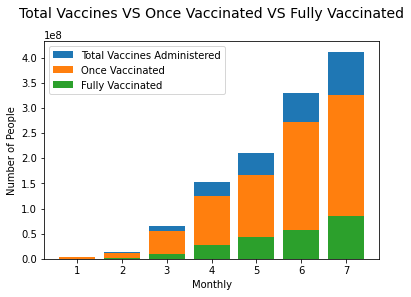

In [16]:
# The y-axis columns are of mean values from this dataset:

plt.bar(vaccines_india_df.month, vaccines_india_df.total_vaccinations, label='Total Vaccines Administered')
plt.bar(vaccines_india_df.month, vaccines_india_df.people_vaccinated, label='Once Vaccinated')
plt.bar(vaccines_india_df.month, vaccines_india_df.people_fully_vaccinated, label='Fully Vaccinated')

plt.title('Total Vaccines VS Once Vaccinated VS Fully Vaccinated', fontsize=14, y=1.08)
plt.xlabel('Monthly')
plt.ylabel('Number of People')
plt.legend();

In [17]:
# df = pd.read_csv('../task-1_datasets/collected_datasets/india_vacc_data-01152021-16072021.csv', parse_dates=['date'])
# df.info()
# df.head()

In [24]:
px.bar(vaccines_india_df, 
       x=vaccines_india_df.month, 
       y=vaccines_india_df.total_vaccinations, 
       title="Total Vaccines Administered from 2021-01-15", 
       color="vaccine", 
       hover_data=['date'])

In [19]:
px.bar(vaccines_india_df, 
       x=vaccines_india_df.month, 
       y=vaccines_india_df.people_vaccinated, 
       title="Total People Vaccinated Once from 2021-01-15", 
       color="vaccine", 
       hover_data=['date'])

In [20]:
fig = px.bar(vaccines_india_df, 
             x=vaccines_india_df.month, 
             y=vaccines_india_df.people_fully_vaccinated, 
             title="Total People Fully Vaccinated from 2021-01-15", 
             color="vaccine", 
             hover_data=['date'])
# labels=dict(x='Monthly - 2021', y='Pople Fully Vaccinated', color='Vaccines Legend')
fig.show()

In [21]:
"""
For comparing all three Total Vaccines VS Once Vaccinated VS Fully Vaccinated
in one Graph:
"""

import plotly.graph_objects as go

In [22]:
# Stacked Bar Graph

fig = go.Figure(data=[
    go.Bar(name='Total Vaccines Administered', 
           x=vaccines_india_df.month, 
           y=vaccines_india_df.total_vaccinations, 
           hovertext=vaccines_india_df.date), 
    go.Bar(name='People Once Vaccinated', 
           x=vaccines_india_df.month, 
           y=vaccines_india_df.people_vaccinated, 
           hovertext=vaccines_india_df.date), 
    go.Bar(name='People Fully Vaccinated(Two doses)', 
           x=vaccines_india_df.month, 
           y=vaccines_india_df.people_fully_vaccinated, 
           hovertext=vaccines_india_df.date)
])

fig.update_xaxes(title='Monthly From January 2021')
fig.update_yaxes(title='Total Vaccines Administered, Once Vaccinated & Fully Vaccinated', 
                 title_font={'size': 12})
fig.update_layout(barmode='stack', 
                  title='Total Vaccines Administered VS Once Vaccinated VS Fully Vaccinated')
fig.show()